In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

1.Mempersiapkan Data

In [2]:
try:
    df = pd.read_csv('Perceraian.csv')
except FileNotFoundError:
    print("Error: File 'divorce_data_cleaned.csv' tidak ditemukan.")
    print("Pastikan file tersebut berada di direktori yang sama.")
    exit()

In [3]:
df.columns = df.columns.str.replace('Fakor Perceraian - ', '').str.strip()

In [4]:
df.dropna(subset=['Provinsi'], inplace=True)
df = df[~df['Provinsi'].str.contains("INDONESIA|JUMLAH|Catatan|Data", na=False, case=False)]

In [5]:
df.head()

,Provinsi,Zina,Mabuk,Madat,Judi,Meninggalkan Salah satu Pihak,Dihukum Penjara,Poligami,Kekerasan Dalam Rumah Tangga,Cacat Badan,Perselisihan dan Pertengkaran Terus Menerus,Kawin Paksa,Murtad,Ekonomi,Jumlah
0,Aceh,6,10,18,26,551,61,28,122,16,5035,3,9,218,6103
1,Sumatera Utara,4,8,23,58,830,62,23,117,4,14454,NaN,73,299,15955
2,Sumatera Barat,2,7,5,30,936,29,22,100,6,6922,NaN,9,224,8292
3,Riau,5,12,25,36,745,99,12,125,7,6922,5,18,231,8242
4,Jambi,4,20,30,46,375,34,9,77,1,3746,2,6,230,4580


In [6]:
numeric_cols = df.columns.drop('Provinsi')
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

In [7]:
provinces = df['Provinsi']

In [8]:
features = df.columns.drop(['Provinsi', 'Jumlah'])
X = df[features]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 42
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Provinsi                                     39 non-null     object
 1   Zina                                         39 non-null     int64 
 2   Mabuk                                        39 non-null     int64 
 3   Madat                                        39 non-null     int64 
 4   Judi                                         39 non-null     int64 
 5   Meninggalkan Salah satu Pihak                39 non-null     int64 
 6   Dihukum Penjara                              39 non-null     int64 
 7   Poligami                                     39 non-null     int64 
 8   Kekerasan Dalam Rumah Tangga                 39 non-null     int64 
 9   Cacat Badan                                  39 non-null     int64 
 10  Perselisihan dan Pert

In [10]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Provinsi                                       0
Zina                                           0
Mabuk                                          0
Madat                                          0
Judi                                           0
Meninggalkan Salah satu Pihak                  0
Dihukum Penjara                                0
Poligami                                       0
Kekerasan Dalam Rumah Tangga                   0
Cacat Badan                                    0
Perselisihan dan Pertengkaran Terus Menerus    0
Kawin Paksa                                    0
Murtad                                         0
Ekonomi                                        0
Jumlah                                         0
dtype: int64


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Data siap untuk di-cluster. Jumlah provinsi yang dianalisis: {len(X_scaled)}\n")


Data siap untuk di-cluster. Jumlah provinsi yang dianalisis: 39



2.Mencari K optimal dengan Elbow Method

In [12]:
wcss = []
k_range = range(1, 11)
for i in k_range:
    kmeans_test = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans_test.fit(X_scaled)
    wcss.append(kmeans_test.inertia_)

Plot Elbow Method telah disimpan sebagai 'elbow_plot.png'



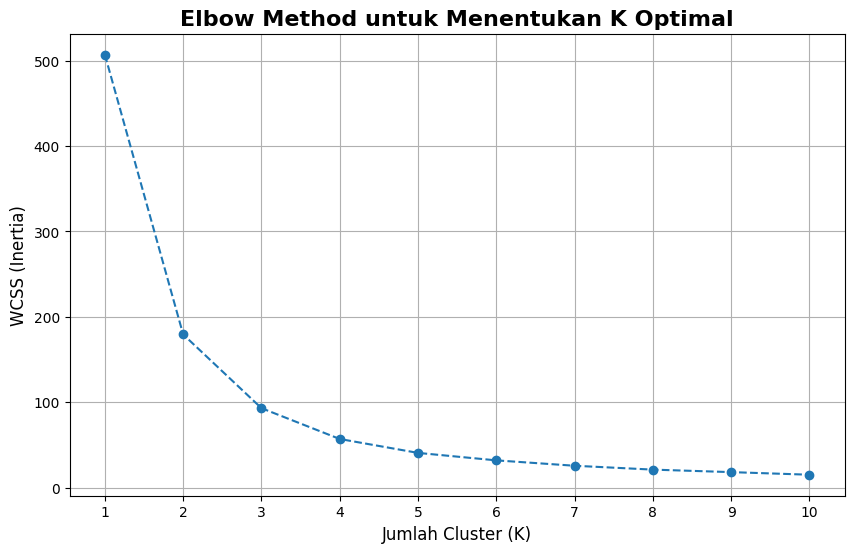

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Cluster (K)', fontsize=12)
plt.ylabel('WCSS (Inertia)', fontsize=12)
plt.grid(True)
plt.xticks(k_range)
plt.savefig('elbow_plot.png')
print("Plot Elbow Method telah disimpan sebagai 'elbow_plot.png'\n")

3.Menjalankan K-Means dan Menganalisis Hasil

In [14]:

k_optimal = 4 # Anda bisa ubah ini ke 3 jika dirasa lebih cocok dari elbow plot
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [15]:
df['Cluster'] = kmeans.labels_


In [16]:
print("Anggota Masing-Masing Cluster:\n")
for i in range(k_optimal):
    cluster_members = df[df['Cluster'] == i]['Provinsi'].values
    if len(cluster_members) > 0:
        print(f"--- CLUSTER {i} ---")
        print(", ".join(cluster_members))
        print("\n")

cluster_profile = df.groupby('Cluster')[features].mean()

print("Profil Karakteristik Setiap Cluster (Rata-rata Kasus):")
print(cluster_profile.round(0))
print("\n")

Anggota Masing-Masing Cluster:

--- CLUSTER 0 ---
Sumatera Barat, Bengkulu, Kepulauan Bangka Belitung, Kepulauan Riau, DI Yogyakarta, Bali, Nusa Tenggara Timur, Kalimantan Tengah, Kalimantan Utara, Sulawesi Utara, Sulawesi Tenggara, Gorontalo, Sulawesi Barat, Maluku, Maluku Utara, Papua Barat, Papua Barat Daya, Papua, Papua Selatan, Papua Tengah, Papua Pegunungan, Satu perkara perceraian bisa terdapat beberapa faktor penyebab/One divorce case can be caused by several causes of divorce


--- CLUSTER 1 ---
Jawa Barat, Jawa Tengah


--- CLUSTER 2 ---
Aceh, Sumatera Utara, Riau, Jambi, Sumatera Selatan, Lampung, DKI Jakarta, Banten, Nusa Tenggara Barat, Kalimantan Barat, Kalimantan Selatan, Kalimantan Timur, Sulawesi Tengah, Sulawesi Selatan


--- CLUSTER 3 ---
Jawa Timur


Profil Karakteristik Setiap Cluster (Rata-rata Kasus):
          Zina  Mabuk  Madat   Judi  Meninggalkan Salah satu Pihak  \
Cluster                                                              
0          2.0   20.0   

4.Visualisasi

Visualisasi profil cluster telah disimpan sebagai 'cluster_profiles.png'

Analisis selesai.


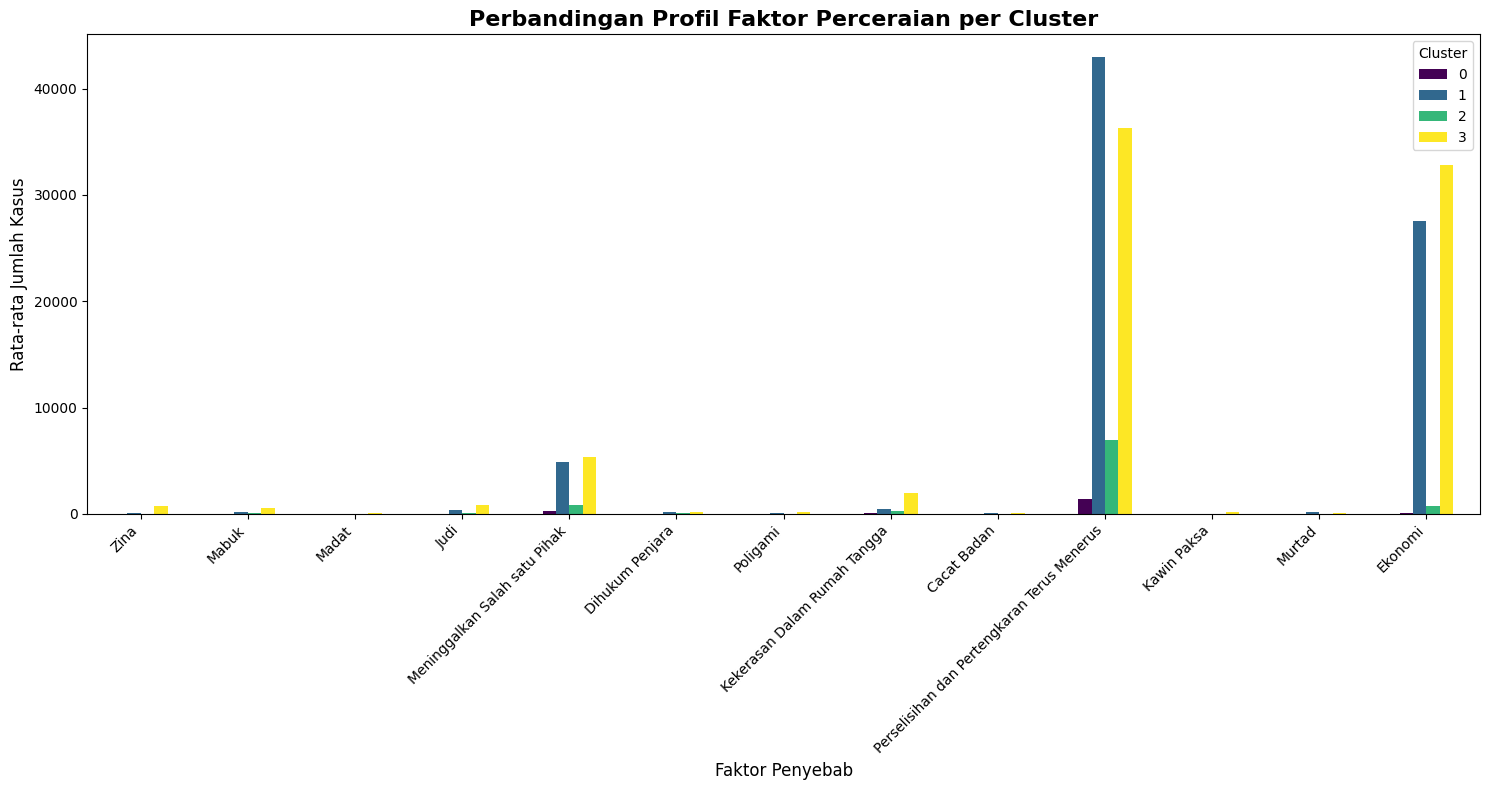

In [17]:
cluster_profile.T.plot(kind='bar', figsize=(15, 8), colormap='viridis')
plt.title('Perbandingan Profil Faktor Perceraian per Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Faktor Penyebab', fontsize=12)
plt.ylabel('Rata-rata Jumlah Kasus', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('cluster_profiles.png')
print("Visualisasi profil cluster telah disimpan sebagai 'cluster_profiles.png'")

print("\nAnalisis selesai.")

Visualisasi Per Daerah

In [23]:
geojson_url = "https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia.geojson"
try:
    response = requests.get(geojson_url)
    response.raise_for_status()
    geojson_data = response.json()
    print("Data GeoJSON berhasil diunduh.")
except requests.exceptions.RequestException as e:
    print(f"Gagal mengunduh data GeoJSON: {e}")
    exit()

Data GeoJSON berhasil diunduh.


In [24]:
province_name_mapping = {
    'Kepulauan Bangka Belitung': 'Bangka-Belitung',
    'DI Yogyakarta': 'Yogyakarta',
    'DKI Jakarta': 'Jakarta Raya'
}
df['Provinsi_Peta'] = df['Provinsi'].replace(province_name_mapping)

m = folium.Map(location=[-2.5, 118], zoom_start=5)

folium.Choropleth(
    geo_data=geojson_data,
    data=df,
    columns=['Provinsi_Peta', 'Cluster'], 
    key_on='feature.properties.state', 
    fill_color='YlOrRd', 
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name='ID Cluster',
    highlight=True
).add_to(m)

folium.features.GeoJsonTooltip(
    fields=['state'],
    aliases=['Provinsi:'],
    style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
).add_to(folium.GeoJson(geojson_data))

map_filename = 'peta_clustering_provinsi.html'
m.save(map_filename)

print(f"\nSelesai!")
print(f"Peta interaktif telah disimpan sebagai '{map_filename}'.")


Selesai!
Peta interaktif telah disimpan sebagai 'peta_clustering_provinsi.html'.


Penjelasan Id Cluster 0.0-0.3
+ Semaki gelap warnanya semakin tinggi tingkat perceraiannya